In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
data=pd.read_excel("/Users/user/Desktop/thesis/Dataset.xlsx")
data.head(20)

,Mix,Ppr,Tpr,ɀ measured
0,Mix1,1.491800,1.627470,0.881
1,NaN,2.218799,1.627470,0.844
2,NaN,2.945797,1.627470,0.818
3,NaN,3.672795,1.627470,0.811
4,NaN,4.399794,1.627470,0.822
5,NaN,5.126792,1.627470,0.846
6,NaN,5.853790,1.627470,0.878
7,NaN,6.580788,1.627470,0.917
8,NaN,7.307787,1.627470,0.959
9,NaN,8.761783,1.627470,1.050


In [3]:
data = data.drop(columns ="Mix")
data.head()

,Ppr,Tpr,ɀ measured
0,1.491800,1.62747,0.881
1,2.218799,1.62747,0.844
2,2.945797,1.62747,0.818
3,3.672795,1.62747,0.811
4,4.399794,1.62747,0.822


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Ppr           0
Tpr           0
ɀ measured    0
dtype: int64

In [5]:
data.describe()

,Ppr,Tpr,ɀ measured
count,1079.000000,1079.000000,1079.000000
mean,12.360625,1.838588,1.285249
std,6.900794,0.253642,0.351064
min,0.162203,1.357125,0.445000
25%,6.799593,1.627470,0.979240
50%,12.059119,1.828655,1.230400
75%,18.239929,2.074112,1.575850
max,25.821442,2.420676,2.192700


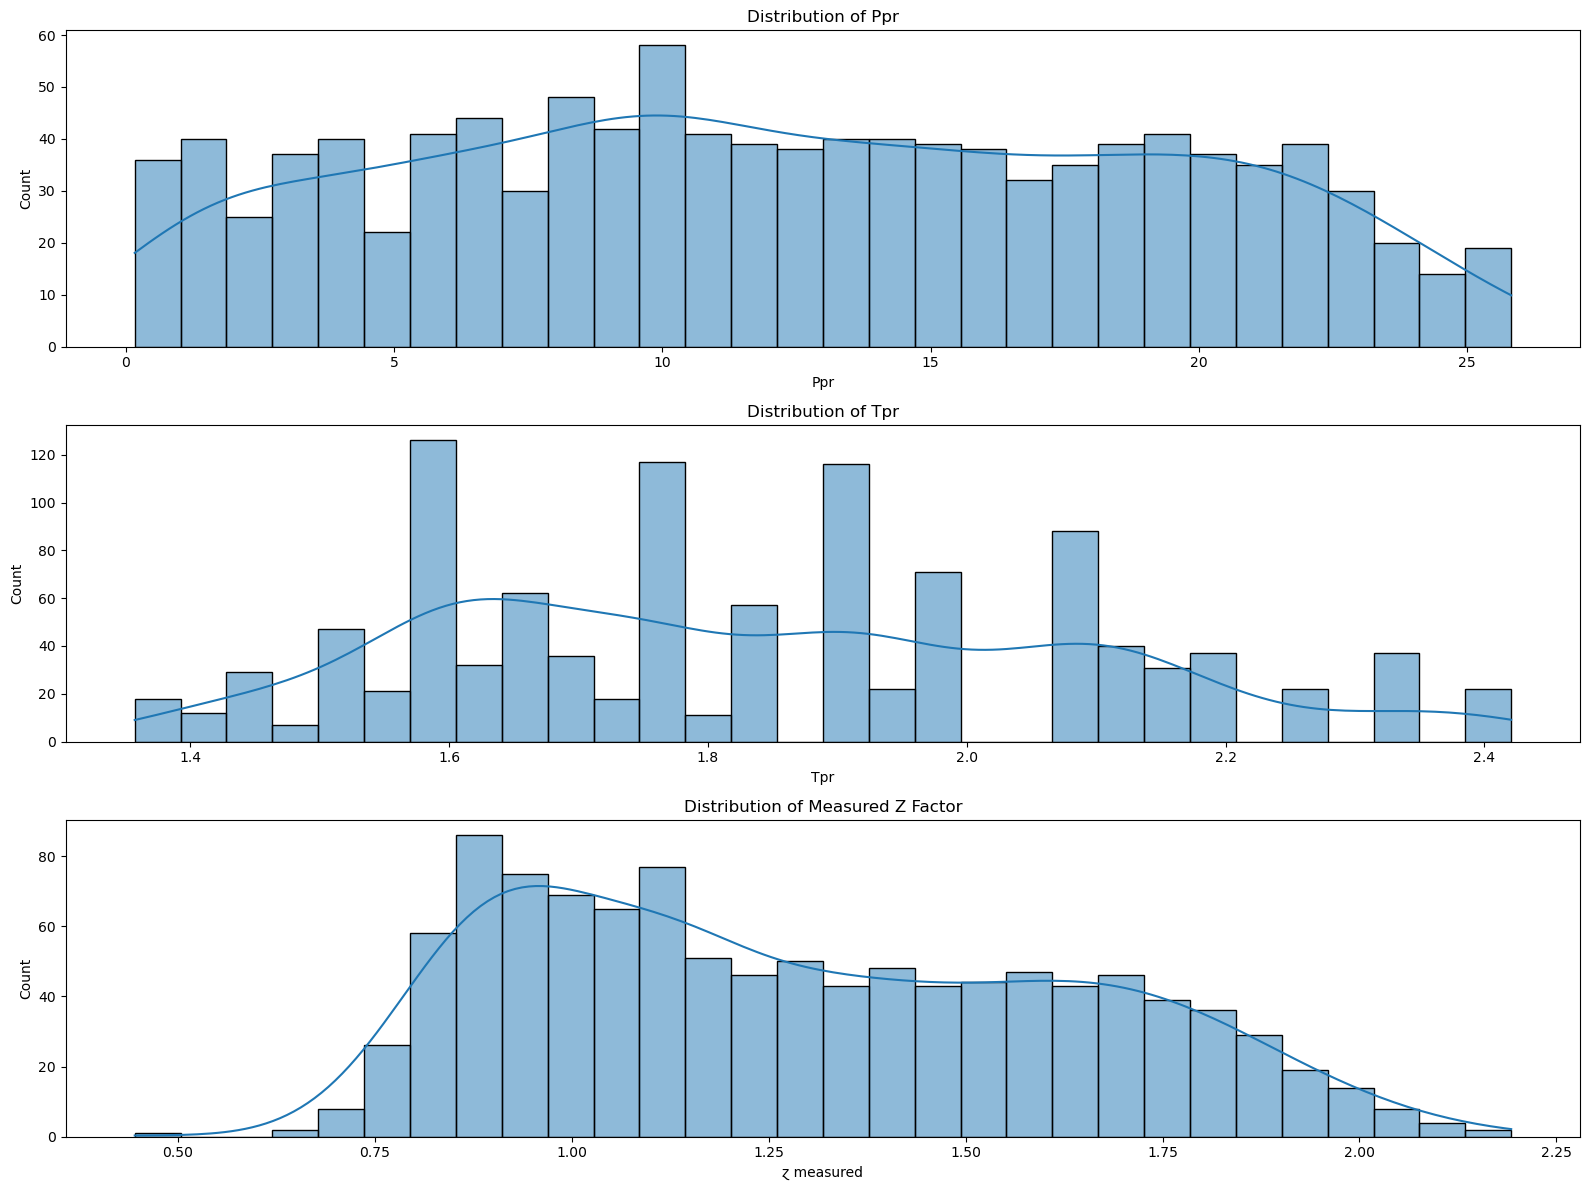

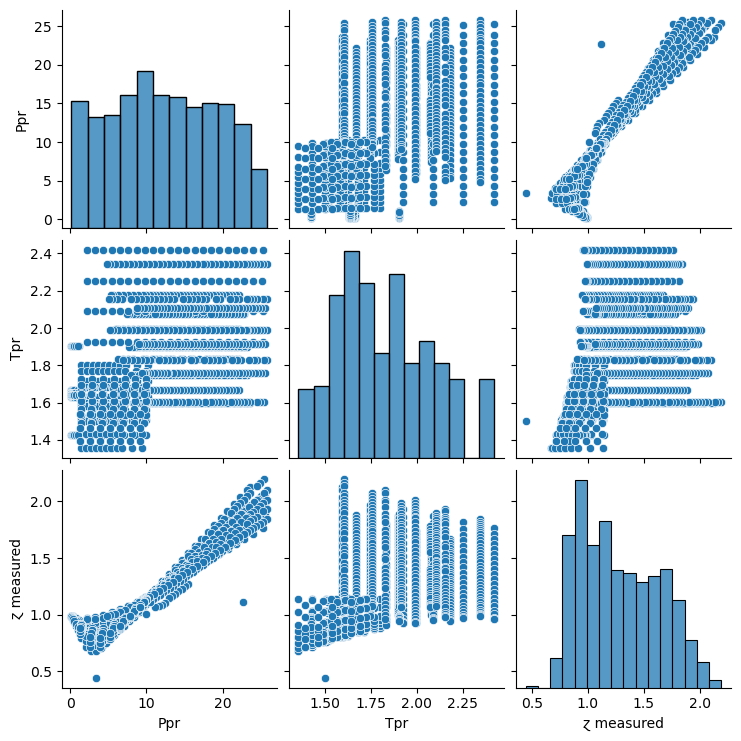

In [6]:
# Visualizations
plt.figure(figsize=(16, 12))

# Distribution plots
plt.subplot(3, 1, 1)
sns.histplot(data['Ppr'], kde=True, bins=30)
plt.title('Distribution of Ppr')

plt.subplot(3, 1, 2)
sns.histplot(data['Tpr'], kde=True, bins=30)
plt.title('Distribution of Tpr')

plt.subplot(3, 1, 3)
sns.histplot(data['ɀ measured'], kde=True, bins=30)
plt.title('Distribution of Measured Z Factor')

plt.tight_layout()
plt.show()

# Pairplot to analyze relationships
sns.pairplot(data)
plt.show()

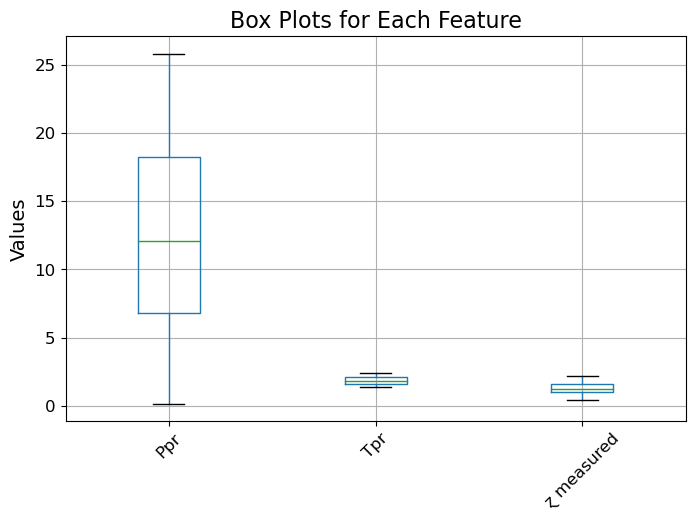

In [7]:

plt.figure(figsize=(8, 5))
data.boxplot(rot=45, fontsize=12)
plt.title('Box Plots for Each Feature', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.show()

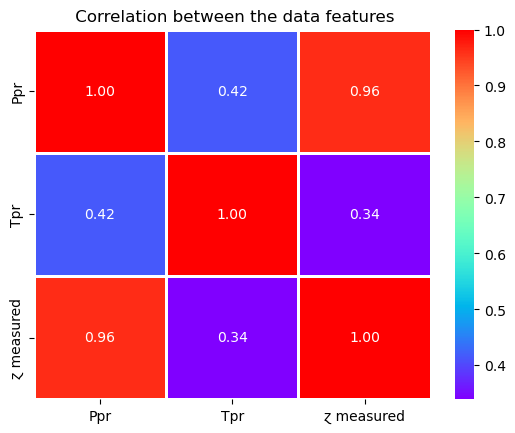

In [8]:
# Correlation between the data features
plt.rcParams["axes.facecolor"]='#FFFFFF'
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='rainbow',fmt='.2f',linewidths=1)
plt.title(" Correlation between the data features")
plt.show()

In [9]:
def get_preds(y_test, y_preds):
    y_test=pd.DataFrame(y_test)
    y_test.rename(columns={0:'Actual'}, inplace=True)
    y_preds=pd.DataFrame(y_preds)
    y_preds.rename(columns={0:'Predicted'}, inplace=True)
    predictions=pd.concat([y_test, y_preds], axis=1)
    return predictions    

In [10]:
X=data.drop(columns="ɀ measured")
y=data["ɀ measured"]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = data[['Ppr', 'Tpr']]
y = data['ɀ measured']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
x_scaled = scaler.transform(X)


# Verify the scaling
(X_train_scaled[:5], X_test_scaled[:5], y_train[:5], y_test[:5])

(array([[ 1.59008009,  0.59691315],
        [ 1.82986017,  0.28574716],
        [ 0.81847379,  0.28574716],
        [ 1.02243401,  0.59691315],
        [ 1.63735106, -0.31894576]]),
 array([[-1.69937409,  0.26050509],
        [ 0.15670738,  0.92386956],
        [-0.0769192 , -0.66826421],
        [ 1.82668868, -0.31894576],
        [-0.20813689,  1.33776682]]),
 876    1.8515
 628    1.9354
 644    1.5530
 882    1.6372
 591    1.9409
 Name: ɀ measured, dtype: float64,
 423    0.96959
 548    1.16400
 730    1.20570
 588    2.01870
 830    1.13820
 Name: ɀ measured, dtype: float64)

## ANN

In [12]:
import tensorflow as tf
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
def build_and_train_ann(X_train, y_train, n_neurons, optimizer):
    # Define model architecture
    model = MLPRegressor(hidden_layer_sizes=(n_neurons,), activation='relu', solver=optimizer, random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    return model

In [14]:
neuron_numbers = range(5, 71, 5)  
optimizers = ['lbfgs', 'adam', 'sgd']  
results = []

for n_neurons in neuron_numbers:
    for optimizer in optimizers:
        model = build_and_train_ann(X_train_scaled, y_train, n_neurons, optimizer)
        # Evaluate model performance
        y_pred = model.predict(X_test_scaled)
        r2_score = model.score(X_test_scaled, y_test)
        mse = mean_squared_error(y_test, y_pred)
        # Store results for comparison
        results.append({
            'n_neurons': n_neurons,
            'optimizer': optimizer,
            'r2_score': r2_score,
            'mse': mse,
        })

In [15]:
# Group results by optimizer
optimizer_results = {}
for result in results:
    optimizer = result['optimizer']
    if optimizer not in optimizer_results:
        optimizer_results[optimizer] = []
    optimizer_results[optimizer].append(result)


In [16]:
for optimizer, data in optimizer_results.items():
    neuron_counts = [result['n_neurons'] for result in data]
    r2_scores = [result['r2_score'] for result in data]
    mses = [result['mse'] for result in data]
    
    # Print results
    print(f"\nResults for optimizer: {optimizer}")
    for result in data:
        print(f"Neurons: {result['n_neurons']}, R2 Score: {result['r2_score']:.4f}, MSE: {result['mse']:.4f}")


Results for optimizer: lbfgs
Neurons: 5, R2 Score: 0.9879, MSE: 0.0017
Neurons: 10, R2 Score: 0.9945, MSE: 0.0008
Neurons: 15, R2 Score: 0.9946, MSE: 0.0008
Neurons: 20, R2 Score: 0.9953, MSE: 0.0007
Neurons: 25, R2 Score: 0.9953, MSE: 0.0007
Neurons: 30, R2 Score: 0.9955, MSE: 0.0006
Neurons: 35, R2 Score: 0.9957, MSE: 0.0006
Neurons: 40, R2 Score: 0.9956, MSE: 0.0006
Neurons: 45, R2 Score: 0.9957, MSE: 0.0006
Neurons: 50, R2 Score: 0.9957, MSE: 0.0006
Neurons: 55, R2 Score: 0.9958, MSE: 0.0006
Neurons: 60, R2 Score: 0.9959, MSE: 0.0006
Neurons: 65, R2 Score: 0.9956, MSE: 0.0006
Neurons: 70, R2 Score: 0.9961, MSE: 0.0006

Results for optimizer: adam
Neurons: 5, R2 Score: 0.8903, MSE: 0.0156
Neurons: 10, R2 Score: 0.9398, MSE: 0.0085
Neurons: 15, R2 Score: 0.9415, MSE: 0.0083
Neurons: 20, R2 Score: 0.9451, MSE: 0.0078
Neurons: 25, R2 Score: 0.9493, MSE: 0.0072
Neurons: 30, R2 Score: 0.9607, MSE: 0.0056
Neurons: 35, R2 Score: 0.9759, MSE: 0.0034
Neurons: 40, R2 Score: 0.9677, MSE: 0.00

In [17]:
# Bayesian Regularization (using Adam)
optimizer = 'adam'
data = optimizer_results[optimizer]
neuron_counts = [result['n_neurons'] for result in data]
r2_scores = [result['r2_score'] for result in data]
mses = [result['mse'] for result in data]

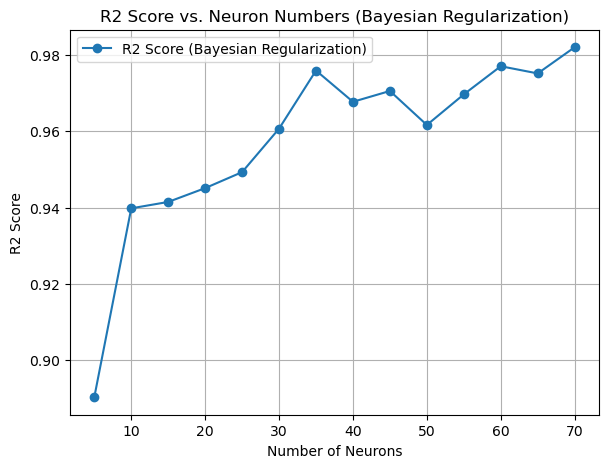

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(neuron_counts, r2_scores, marker='o', label='R2 Score (Bayesian Regularization)')
plt.xlabel('Number of Neurons')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Neuron Numbers (Bayesian Regularization)')
plt.grid(True)
plt.legend()

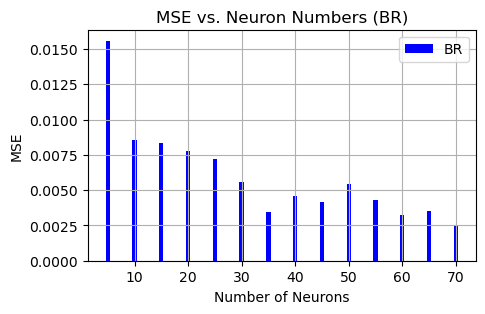

In [19]:
plt.figure(figsize=(5, 3))
plt.bar(neuron_counts, mses, color='blue', label='BR')
plt.xlabel('Number of Neurons')
plt.ylabel('MSE')
plt.title('MSE vs. Neuron Numbers (BR)')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# Scaled Conjugate Gradient (using SGD)
optimizer = 'sgd'
data = optimizer_results[optimizer]
neuron_counts = [result['n_neurons'] for result in data]
r2_scores = [result['r2_score'] for result in data]
mses = [result['mse'] for result in data]

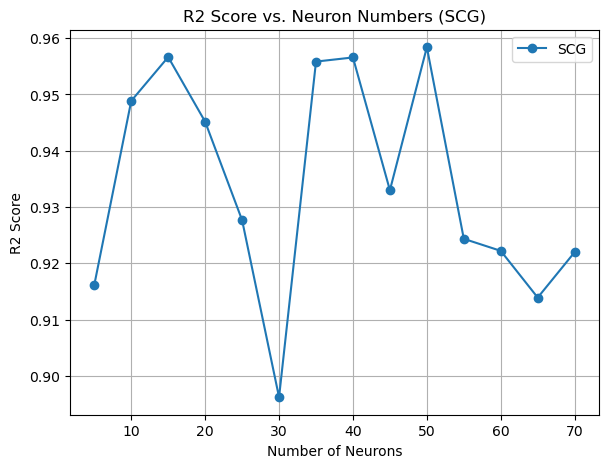

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(neuron_counts, r2_scores, marker='o', label='SCG')
plt.xlabel('Number of Neurons')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Neuron Numbers (SCG)')
plt.grid(True)
plt.legend()

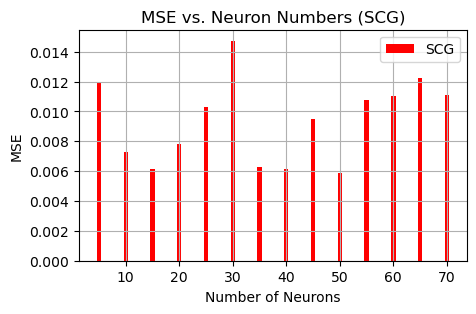

In [22]:
plt.figure(figsize=(5, 3))
plt.bar(neuron_counts, mses, color='red', label='SCG')
plt.xlabel('Number of Neurons')
plt.ylabel('MSE')
plt.title('MSE vs. Neuron Numbers (SCG)')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
# Levenberg-Marquardt (using lbfgs)
optimizer = 'lbfgs'
data = optimizer_results[optimizer]
neuron_counts = [result['n_neurons'] for result in data]
r2_scores = [result['r2_score'] for result in data]
mses = [result['mse'] for result in data]


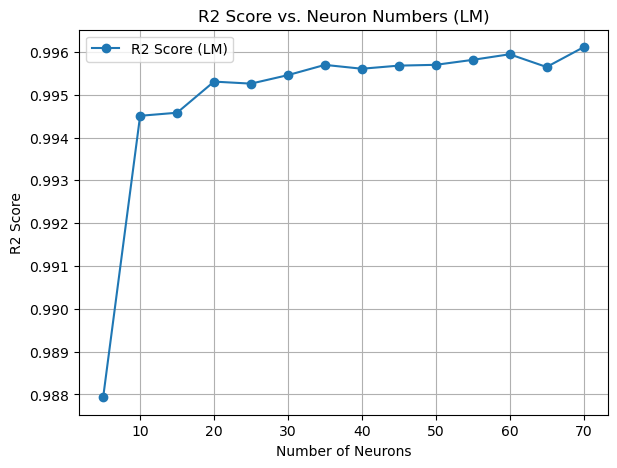

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(neuron_counts, r2_scores, marker='o', label='R2 Score (LM)')
plt.xlabel('Number of Neurons')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Neuron Numbers (LM)')
plt.grid(True)
plt.legend()


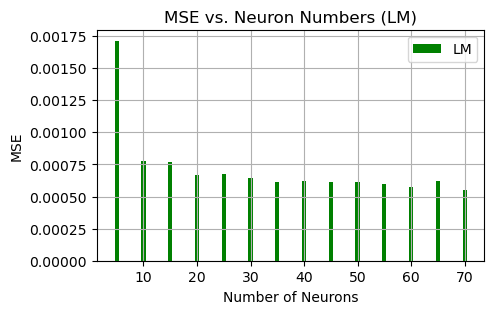

In [25]:
plt.figure(figsize=(5, 3))
plt.bar(neuron_counts, mses, color='green', label='LM')
plt.xlabel('Number of Neurons')
plt.ylabel('MSE')
plt.title('MSE vs. Neuron Numbers (LM)')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
# Train models and store predictions
all_predictions = []

for optimizer in optimizers:
    optimizer_predictions = {'train': [], 'test': [], 'total': []}
    for n_neurons in neuron_numbers:
        model = build_and_train_ann(X_train_scaled, y_train, n_neurons, optimizer)
        
        # Predictions
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        y_total_pred = model.predict(scaler.transform(X))
        
        # Store predictions
        optimizer_predictions['train'].append((n_neurons, y_train, y_train_pred))
        optimizer_predictions['test'].append((n_neurons, y_test, y_test_pred))
        optimizer_predictions['total'].append((n_neurons, y, y_total_pred))
    
    all_predictions.append((optimizer, optimizer_predictions))


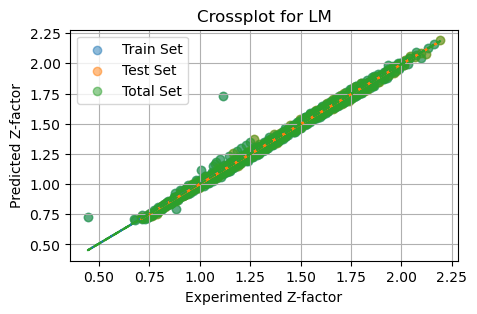

In [27]:
optimizer = 'lbfgs'
predictions = [pred for opt, pred in all_predictions if opt == optimizer][0]

# Find the best neuron count based on MSE for the test set
best_neuron, best_mse = min([(neuron, mean_squared_error(y_test, y_test_pred)) 
                             for neuron, _, y_test_pred in predictions['test']], 
                            key=lambda x: x[1])

fig, ax = plt.subplots(figsize=(5, 3))

for dataset_type in ['train', 'test', 'total']:
    y_exp, y_pred = None, None
    for neuron, y_e, y_p in predictions[dataset_type]:
        if neuron == best_neuron:
            y_exp, y_pred = y_e, y_p
            break

    ax.scatter(y_exp, y_pred, alpha=0.5, label=f'{dataset_type.capitalize()} Set')
    
    # Add fitted line
    z = np.polyfit(y_exp, y_pred, 1)
    p = np.poly1d(z)
    ax.plot(y_exp, p(y_exp), linestyle="--")

ax.set_xlabel('Experimented Z-factor')
ax.set_ylabel('Predicted Z-factor')
ax.set_title('Crossplot for LM')
ax.grid(True)
ax.legend()
plt.show()


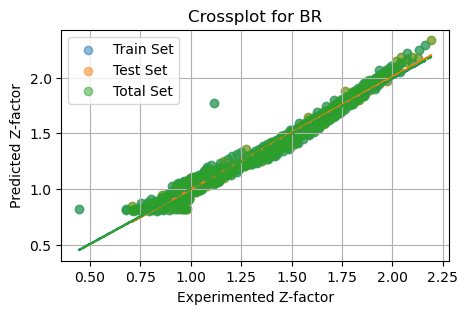

In [28]:
optimizer = 'adam'
predictions = [pred for opt, pred in all_predictions if opt == optimizer][0]

# Find the best neuron count based on MSE for the test set
best_neuron, best_mse = min([(neuron, mean_squared_error(y_test, y_test_pred)) 
                             for neuron, _, y_test_pred in predictions['test']], 
                            key=lambda x: x[1])

fig, ax = plt.subplots(figsize=(5, 3))

for dataset_type in ['train', 'test', 'total']:
    y_exp, y_pred = None, None
    for neuron, y_e, y_p in predictions[dataset_type]:
        if neuron == best_neuron:
            y_exp, y_pred = y_e, y_p
            break

    ax.scatter(y_exp, y_pred, alpha=0.5, label=f'{dataset_type.capitalize()} Set')
    
    # Add fitted line
    z = np.polyfit(y_exp, y_pred, 1)
    p = np.poly1d(z)
    ax.plot(y_exp, p(y_exp), linestyle="--")

ax.set_xlabel('Experimented Z-factor')
ax.set_ylabel('Predicted Z-factor')
ax.set_title('Crossplot for BR')
ax.grid(True)
ax.legend()
plt.show()


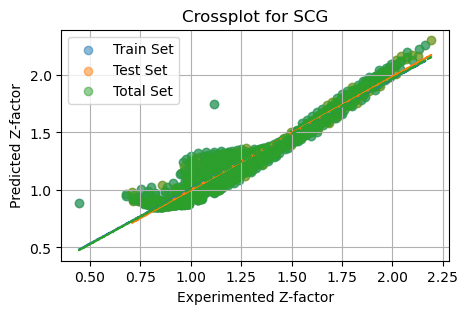

In [29]:
optimizer = 'sgd'
predictions = [pred for opt, pred in all_predictions if opt == optimizer][0]

# Find the best neuron count based on MSE for the test set
best_neuron, best_mse = min([(neuron, mean_squared_error(y_test, y_test_pred)) 
                             for neuron, _, y_test_pred in predictions['test']], 
                            key=lambda x: x[1])

fig, ax = plt.subplots(figsize=(5, 3))

for dataset_type in ['train', 'test', 'total']:
    y_exp, y_pred = None, None
    for neuron, y_e, y_p in predictions[dataset_type]:
        if neuron == best_neuron:
            y_exp, y_pred = y_e, y_p
            break

    ax.scatter(y_exp, y_pred, alpha=0.5, label=f'{dataset_type.capitalize()} Set')
    
    # Add fitted line
    z = np.polyfit(y_exp, y_pred, 1)
    p = np.poly1d(z)
    ax.plot(y_exp, p(y_exp), linestyle="--")

ax.set_xlabel('Experimented Z-factor')
ax.set_ylabel('Predicted Z-factor')
ax.set_title('Crossplot for SCG')
ax.grid(True)
ax.legend()
plt.show()

In [30]:
def compute_aard(actual, predicted):
    
    relative_deviation = np.abs((actual-predicted)/actual)
    
    aard = np.mean(relative_deviation) * 100
    
    return aard

In [31]:
ann_model = MLPRegressor(hidden_layer_sizes=(70,), activation='relu', solver="lbfgs", random_state=42)
ann_model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(70,), random_state=42, solver='lbfgs')

In [38]:
# Extract the weights (coefs_) and biases (intercepts_)
weights_input_to_hidden = ann_model.coefs_[0]   
biases_hidden = ann_model.intercepts_[0]      
weights_hidden_to_output = ann_model.coefs_[1]
biases_output = ann_model.intercepts_[1][0]

In [39]:
# Create the DataFrame
df = pd.DataFrame(weights_input_to_hidden, index=[f'Input{i+1}' for i in range(weights_input_to_hidden.shape[0])])

# Transpose to have Hidden Neurons as rows
df = df.T

# Add the hidden layer bias (b1)
df['b1'] = biases_hidden

# Add the output layer weights (LW)
df['LW'] = weights_hidden_to_output.flatten()

# Add the output layer bias (b2)
df['b2'] = [biases_output] + [None] * (df.shape[0] - 1)

# Rearrange the columns to match the desired format
df_final = df[['Input1', 'Input2', 'b1', 'LW', 'b2']]


In [40]:
df_final

,Input1,Input2,b1,LW,b2
0,-0.082470,0.147620,0.259109,0.029170,0.295892
1,0.270417,-0.210563,-0.031115,0.107958,NaN
2,0.168406,-0.224444,0.030819,-0.079303,NaN
3,0.033965,0.269460,-0.061020,-0.205804,NaN
4,-0.305609,0.110350,-0.254102,0.374327,NaN
...,...,...,...,...,...
65,0.024628,-0.101980,-0.283365,0.000881,NaN
66,-0.294592,-0.027397,-0.521620,0.529448,NaN
67,0.108495,-0.040637,0.228890,0.069743,NaN
68,-0.283884,-0.113136,-0.528882,0.550663,NaN


In [42]:
df_final.to_excel(r"C:\Users\USER\Documents\WORKS\model_weights_and_biases.xlsx", index=False)

In [33]:
import pickle
# Save the model and the scaler
with open('ann_model.pkl', 'wb') as model_file, open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(ann_model, model_file)
    pickle.dump(scaler, scaler_file)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
y_df = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_df)
mse = mean_squared_error(y_test, y_df)
aard = compute_aard(y_test, y_df)

In [50]:
print("R2 OF ANN MODEL =", r2)
print("MSE OF ANN MODEL =", mse)
print("AARD OF ANN MODEL =", aard)

R2 OF ANN MODEL = 0.9961095321882101
MSE OF ANN MODEL = 0.0005524246843603456
AARD OF ANN MODEL = 1.332786744209194


### BUILD UP FOR GMDH & GP

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge

In [48]:
krr = KernelRidge(alpha = 0.001,gamma = 0.1, kernel="rbf")
krr.fit(X_train_scaled, y_train)

KernelRidge(alpha=0.001, gamma=0.1, kernel='rbf')

In [54]:
rf = RandomForestRegressor(random_state=1, n_estimators = 100, max_depth = 6)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=6, random_state=1)

In [55]:
# meta-model features
meta_features_train = np.column_stack([
    rf.predict(X_train_scaled),
    krr.predict(X_train_scaled)
])

meta_features_test = np.column_stack([
    rf.predict(X_test_scaled),
    krr.predict(X_test_scaled)
])

meta_features = np.column_stack([
    rf.predict(x_scaled),
    krr.predict(x_scaled)
])

## GMDH

In [46]:
from gmdh import Combi, split_data

In [56]:
# Create and train the Combi model
model_gmdh = Combi()
model_gmdh.fit(meta_features_train, y_train.to_numpy())

In [58]:
y_pred_gmdh = model_gmdh.predict(meta_features_test)

In [60]:
r2_gmdh = r2_score(y_test, y_pred_gmdh)
mse_gmdh = mean_squared_error(y_test, y_pred_gmdh)
aard_gmdh = compute_aard(y_test, y_pred_gmdh)
print("MSE of the GMDH Model is:", mse_gmdh)
print( "R2 SCORE of the GMDH Model is:", r2_gmdh)
print("AARD SCORE of the GMDH Model is:", aard_gmdh)

MSE of the GMDH Model is: 0.0009330418808748326
R2 SCORE of the GMDH Model is: 0.993429023888028
AARD SCORE of the GMDH Model is: 1.801075177612235


## GENETIC PROGRAMMING

In [209]:
## Please only run this cell if you do not have gplearn installed

pip install gplearn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from gplearn.genetic import SymbolicRegressor

In [62]:
# Define the symbolic regressor
gp = SymbolicRegressor(
    population_size=1000,
    generations=50,
    stopping_criteria=0.01,
    function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv'],
    p_crossover=0.6,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.1,
    p_point_mutation=0.1,
    max_samples=0.3,
    verbose=1,
    parsimony_coefficient=0.01,
    random_state=56
)

In [63]:
# Train the model
gp.fit(meta_features_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.30          15.5977        2        0.0160672         0.018519     37.86s
   1     6.09           1.0474        2        0.0156925        0.0186788     31.70s
   2     2.17         0.267185        1        0.0150295        0.0189615     25.99s
   3     1.36         0.148458        1        0.0146965        0.0191035     26.66s
   4     1.29         0.189055        1        0.0146816        0.0191099     24.92s
   5     1.31         0.170375        1        0.0149675         0.018988     24.19s
   6     1.33         0.213223        1        0.0147262        0.0190909     23.70s
   7     1.35         0.122028        1        0.0145093        0.0191834     23.10s
   8     1.31         0.151514        1        0.0148094        0.0190554  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv'],
                  generations=50, max_samples=0.3, p_crossover=0.6,
                  p_hoist_mutation=0.1, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  random_state=56, stopping_criteria=0.01, verbose=1)

In [69]:
y_gp = gp.predict(meta_features_test)

In [70]:
mse_gp = mean_squared_error(y_test, y_gp)
r2_gp = r2_score(y_test, y_gp)
aard_gp = compute_aard(y_test, y_gp)

In [71]:
print("MSE of the GP Model is:", mse_gp)
print( "R2 SCORE of the GP Model is:", r2_gp)
print("AARD SCORE of the GP Model is:", aard_gp)

MSE of the GP Model is: 0.0009604461980357706
R2 SCORE of the GP Model is: 0.9932360281424774
AARD SCORE of the GP Model is: 1.8019988102844005


## SUMMARY 

In [68]:
Ppr = X["Ppr"]
Tpr = X["Tpr"]
Z_measured = y

gen_pred = gp.predict(meta_features)
gmdh_pred = model_gmdh.predict(meta_features) 
ann_pred = model.predict(x_scaled)  

# Create a DataFrame
results_df = pd.DataFrame({
    'Ppr': Ppr,
    'Tpr': Tpr,
    'Z measured': Z_measured,
    'ANN Pred': ann_pred.flatten(),  
    'GMDH pred': gmdh_pred,
    'Genetic Pred': gen_pred
})

results_df.reset_index(drop = True)[:20]

,Ppr,Tpr,Z measured,ANN Pred,GMDH pred,Genetic Pred
0,1.491800,1.627470,0.881,0.894396,0.863224,0.865714
1,2.218799,1.627470,0.844,0.856354,0.822175,0.824919
2,2.945797,1.627470,0.818,0.828032,0.821395,0.824145
3,3.672795,1.627470,0.811,0.816028,0.822473,0.825216
4,4.399794,1.627470,0.822,0.829892,0.828861,0.831565
5,5.126792,1.627470,0.846,0.854917,0.831718,0.834404
6,5.853790,1.627470,0.878,0.882846,0.863550,0.866038
7,6.580788,1.627470,0.917,0.924026,0.916689,0.918848
8,7.307787,1.627470,0.959,0.966603,0.948256,0.950219
9,8.761783,1.627470,1.050,1.053073,1.058712,1.059990


In [449]:
results_df.to_excel(r"C:\Users\USER\Documents\WORKS\summary_data.xlsx")

### COMPRESSIBILITY FACTOR PREDICTING WEB APP

In [56]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import pickle
import numpy as np

# Load the trained model and scaler from pickle files
with open('ann_model.pkl', 'rb') as model_file, open('scaler.pkl', 'rb') as scaler_file:
    ann_model = pickle.load(model_file)
    scaler = pickle.load(scaler_file)

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("COMPRESSIBILITY FACTOR PREDICTING TOOL", style={'font-size': '24px', 'text-align': 'left'}), className="mb-4 mt-4")
    ]),
    dbc.Row([
        dbc.Col([
            dbc.Label("Enter Ppr (pseudo-reduced pressure):"),
            dbc.Input(id="input-ppr", type="number", placeholder="Enter Ppr", step=0.000001)
        ], width=6)
    ]),
    dbc.Row([
        dbc.Col([
            dbc.Label("Enter Tpr (pseudo-reduced temperature):"),
            dbc.Input(id="input-tpr", type="number", placeholder="Enter Tpr", step=0.000001)
        ], width=6)
    ]),
    dbc.Row([
        dbc.Col([
            dbc.Button("Predict z Factor", id="predict-button", color="primary", className="mt-4")
        ], width=6)
    ]),
    dbc.Row([
        dbc.Col([
            html.H4("Predicted z Factor:"),
            html.Div(id="output-z-factor", className="mt-2")
        ], width=6)
    ])
])

# Define the callback to update the z factor
@app.callback(
    Output("output-z-factor", "children"),
    Input("predict-button", "n_clicks"),
    [Input("input-ppr", "value"), Input("input-tpr", "value")]
)
def update_z_factor(n_clicks, ppr, tpr):
    if n_clicks is None:
        return ""
    if ppr is None or tpr is None:
        return "Please enter valid Ppr and Tpr values."
    
    # Prepare the input data for the model
    input_data = np.array([[ppr, tpr]])
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    
    # Predict the z factor using the loaded model
    z_factor = ann_model.predict(input_data_scaled)
    
    return f"{z_factor[0]:.6f}" 

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)

UPON RUNNING THE APP ABOVE, PLEASE CLICK THIS LINK TO LAUNCH THE APP ON YOUR LOCAL BROWSER

http://127.0.0.1:8050/